## Climate Analysis

## Set Up

In [1]:
import pandas as pd

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
#Create an engine to connect to the database
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

## Explore Database

In [5]:
#Check the tables in the database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station VARCHAR(255)
date VARCHAR(255)
prcp FLOAT
tobs INTEGER


In [7]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-06', None, 73)]

In [8]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

## Refelcet Database and Query

In [9]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [10]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
session = Session(engine)

In [12]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f8d31af60>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

In [13]:
# Display the station column in Measurement table
results = session.query(Measurement.station).all()
results[:5]

[('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397')]

## Precipitation Analysis

In [27]:
#Dependencies
import datetime
from datetime import timedelta

In [28]:
# Query prcp data within one year
one_year = timedelta(days=365)
one_year_prcp=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > (datetime.datetime.today()-one_year)).all()

In [16]:
#Create the dataframe for the one-year prcp data
prcp_df=pd.DataFrame(one_year_prcp).set_index('date')
prcp_df.head()

,prcp
date,
2016-10-26,0.00
2016-10-27,0.00
2016-10-28,0.00
2016-10-29,0.00
2016-10-30,0.24


<IPython.core.display.Javascript object>


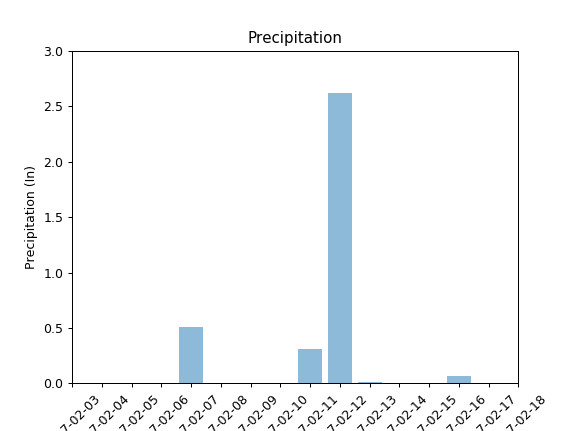

In [26]:
#Plot the prcp data against date
### BEGIN SOLUTION
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
x_axis = np.arange(len(prcp_df))
y_axis = prcp_df['prcp']
xticks = prcp_df.index
 
plt.bar(x_axis, y_axis, align='center', alpha=0.5)
plt.xticks(x_axis, xticks, rotation=45)
plt.xlim(100, 115)
plt.ylim(0, 3)
plt.xlabel('Date')
plt.ylabel('Precipitation (In)')
plt.title('Precipitation')
 
plt.show()

In [18]:
# Display the summary statistics of precipitation data
prcp_df.describe()

,prcp
count,1652.000000
mean,0.165169
std,0.430417
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000
